## <font color=blue> Stats507-001 , WI 2019</font>
### Zizhao Zhang
#### zizhaoz@umich.edu
***

Time spent on problems(hours):   *Problem 1*: 1 , *Problem 2*: 1.5 *Problem 3*: 2

***

Persons discussed idea about: None

**required module**

In [14]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import chi2
from matplotlib import animation
import warnings
from IPython.display import display, clear_output
import time
import pylab as pl
warnings.filterwarnings('ignore')

### Problem 1. Warmup: plotting CLTs (2 points)

#### 1.1：
Define a function **wigner_density** that takes a single number (integer or float) as its
input and returns a float as its output, given by the value of the semicircular density
evaluated at the input. That is, for a number x, wigner_density(x) should return
f(x), where f is defined above in Equation (1). You do not need to perform any error
checking in this function, but note that your function should operate equally well on
Python ints/floats and on numpy ints/floats, and you should be able to accomplish
this without checking the type of the input. Use the **numpy.sqrt** function for the
square root, not the Python math.sqrt function.

In [15]:
def wigner_density(x):
    if abs(x)<=2:
        return np.sqrt(4-x**2)/(2*(np.pi))
    else: 
        return 0

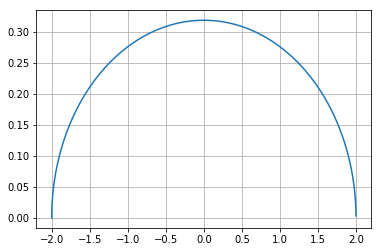

In [16]:
x = np.arange(-2,2,0.0001)
y = [wigner_density(i) for i in x]
plt.grid()
plt.plot(x,y)

The result does confirms with the idea of structuring a semicircle

#### 1.2: 
Define a function **generate_wigner** that takes a single positive integer n as its
argument and returns a random n-by-n Wigner matrix. Your function should raise
an appropriate error in the event that the input is not an integer or if it is not
positive. $$
\begin{array} { l } { \text {  define a matrix-valued random variable } Z \in \mathbb { R } ^ { n \times n } \text { by generating } Z _ { i , j } \text { i.i.d. } } \\ { \text { normal with mean } 0 \text { and variance } 1 / n \text { for all } 1 \leq i \leq j \leq n , \text { and set } Z _ { j , i } = Z _ { i , j } \text { for } } \\ { 1 \leq j \leq i \leq n . \text { Then the matrix } Z \in \mathbb { R } ^ { n \times n } \text { is called a Wigner matrix. } } \end{array}
$$

In [17]:
def generate_wigner(n):
    if not isinstance(n,(int,np.int64,np.int32)):
        raise TypeError("input type should be an int")
    elif n<=0:
        raise ValueError("input a positive integer")
    M = np.matrix(np.random.normal(0, np.sqrt(1/n), n*n))
    M.shape = (n,n)
    return np.matrix(np.tril(M) + np.tril(M,-1).T)

In [18]:
generate_wigner(1)

matrix([[-0.01764565]])

#### 1.3:
The RMT result referenced above states that the joint distribution of the eigenvalues of a random Wigner matrix converges to the semicircular law. Write a function
**get_spectrum** that takes a numpy matrix or 2-dimensional numpy array and returns a numpy array of its eigenvalues in non-decreasing order. You do not need to
perform any error checking for this function. 

In [19]:
from numpy import linalg as LA
def get_spectrum(M):
    return np.sort(LA.eig(M)[0])

In [20]:
get_spectrum(generate_wigner(4))

array([-0.48796226,  0.01746808,  0.16097977,  1.10137717])

#### 1.4:
Create a **plot with four subplots, arranged vertically, each showing a (normalized)
histogram, in blue, of the eigenvalues of a random n-by-n Wigner matrix for n =
100, 200, 500 and 1000.** In each subplot, overlay a red curve indicating the density of
the semicircular law, as defined in (1). Hint: depending on how you implemented
wigner_density above, you may find the numpy.vectorize function helpful.

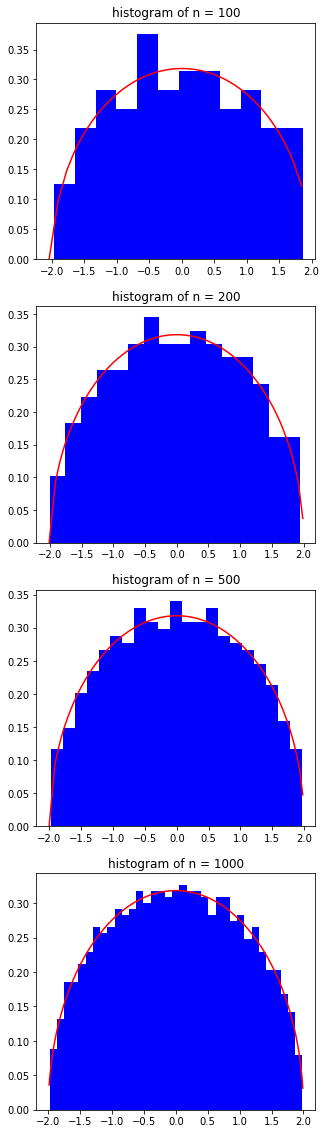

In [21]:
plt.figure(figsize=(5,20))
#eignvals of matrix as x_is
x_1 = get_spectrum(generate_wigner(100))
x_2 = get_spectrum(generate_wigner(200))
x_3 = get_spectrum(generate_wigner(500))
x_4 = get_spectrum(generate_wigner(1000))
########100##############################
plt.subplot(4,1,1)
x1_1 = get_spectrum(generate_wigner(100))
y1_1 = np.array(list(map(wigner_density, x1_1)))
plt.hist(x_1,normed = 1,bins = 12,color = "blue")
plt.plot(x1_1,y1_1, color = "red")
plt.title('histogram of n = 100')
#########200#############################
plt.subplot(4,1,2)
x2_2 = get_spectrum(generate_wigner(200))
y2_2 = np.array(list(map(wigner_density, x2_2)))
plt.hist(x_2,normed = 1,bins = 16, color = "blue")
plt.plot(x2_2,y2_2, color = "red")
plt.title('histogram of n = 200')
#########500#############################
plt.subplot(4,1,3)
x3_3 = get_spectrum(generate_wigner(500))
y3_3 = np.array(list(map(wigner_density, x3_3)))
plt.hist(x_3,normed = 1,bins = 21,color = "blue")
plt.plot(x3_3,y3_3, color = "red")
plt.title('histogram of n = 500')
#########1000#############################
plt.subplot(4,1,4)
plt.hist(x_4,normed = 1,bins = 35,color = "blue")
x4_4 = get_spectrum(generate_wigner(1000))
y4_4 = np.array(list(map(wigner_density, x4_4)))
plt.plot(x4_4,y4_4, color = "red")
plt.title('histogram of n = 1000')
_ = plt.show()

### Problem 2: Plotting a Mixture of Normals (3 points)

#### 2.1: 
Download the .zip file, extract it, and read the two files into **numpy**. Please include
both labels.npy and points.dlm in your final submission. The former of these
should yield a numpy array of 0s and 1s, and the latter should yield a 100-by-2
numpy array, in which each row corresponds to a 2-dimensional point. The i-th
entry of the array in labels.npy corresponds to the cluster membership label of the
i-th row of the matrix stored in points.dlm.

In [22]:
##read in the desired files
points = np.loadtxt("./points.dlm")
labels = np.load("./labels.npy")

#### 2.2:
Generate a scatter plot of the data. Each data point should appear as an **x** (often
called a cross in data visualization packages), colored according to its cluster membership as given by points.npy. The points with cluster label 0 should be colored
blue, and those with cluster label 1 should be colored red. Set the x and y axes to
both range from 0 to 1. Adjust the size of the point markers to what you believe to
be reasonable (i.e., aesthetically pleasing, visible, etc).

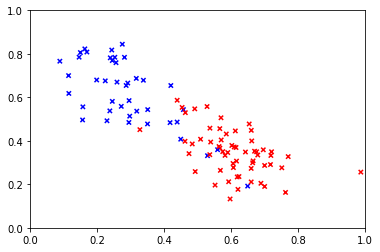

In [37]:
##assign label color
lab_co = ["blue" if l == 0 else "red" for l in labels]
plt.xlim(0,1)
plt.ylim(0,1)
c_scat = plt.scatter(points[:,0],points[:,1],c = lab_co, s = 19, 
                     marker = "x",linewidths=3)
_ = plt.show()

#### 2.3:
Theoretically, the data should approximate a mixture of normals with means and
covariance matrices given by $$
\begin{array} { l } { \mu _ { 0 } = ( 0.2,0.7 ) ^ { T } , \Sigma _ { 0 } = \left[ \begin{array} { c c } { 0.015 } & { - 0.011 } \\ { - 0.011 } & { 0.018 } \end{array} \right] } \\ { \mu _ { 1 } = ( 0.65,0.3 ) ^ { T } , \Sigma _ { 1 } = \left[ \begin{array} { c c } { 0.016 } & { - 0.011 } \\ { - 0.011 } & { 0.016 } \end{array} \right] } \end{array}
$$
For each of these two normal distributions, add two contour lines corresponding
to 1 and 2 “standard deviations” of the distribution. We will take the 1-standard deviation contour to be the level set (which is an ellipse) of the normal distribution
that encloses probability mass 0.68 of the distribution, and the 2-standard deviation
contour to be the level set that encloses probability mass 0.95 of the distribution.
The contour lines for cluster 0 should be colored blue, and the lines for cluster 1
should be colored red. The contour lines will go off the edge of the 1-by-1 square
that we have plotted. Do not worry about that. Hint: these ellipses are really just
confidence regions given by $$
( x - \mu ) ^ { T } \Sigma ^ { - 1 } ( x - \mu ) \leq \chi _ { 2 } ^ { 2 } ( p )
$$
$$
\begin{array} { l } { \text { where } p \text { is a probability and } \chi _ { d } ^ { 2 } \text { is the quantile function for the } \chi ^ { 2 } \text { distribution with } d } \\ { \text { degrees of freedom. ** Hint: use the optional argument levels for the pyplot. contour } } \\ { \text { function. **} } \end{array}
$$

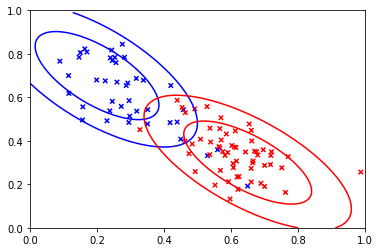

In [24]:
####import
import scipy.stats
from scipy.stats import chi2
mu_1, mu_2 = np.array([0.2,0.7]), np.array([0.65,0.3])
cov_1, cov_2 = np.array([[0.015,-0.011],[-0.011,0.018]]),\
                np.array([[0.016,-0.011],[-0.011,0.016]])

plt.xlim(0,1)
plt.ylim(0,1)
mvn1 = scipy.stats.multivariate_normal(mu_1,cov_1)
mvn2 = scipy.stats.multivariate_normal(mu_2,cov_2)
x, y = np.mgrid[0:1:.01, 0:1:.01]
pos = np.empty(x.shape + (2,))
level_68_1 = (((2*np.pi)*np.linalg.det(cov_1)**(0.5))**(-1))*np.exp(-0.5*chi2.ppf(0.68,2))
level_68_2 = (((2*np.pi)*np.linalg.det(cov_2)**(0.5))**(-1))*np.exp(-0.5*chi2.ppf(0.68,2))
level_95_1 = (((2*np.pi)*np.linalg.det(cov_1)**(0.5))**(-1))*np.exp(-0.5*chi2.ppf(0.95,2))
level_95_2 = (((2*np.pi)*np.linalg.det(cov_2)**(0.5))**(-1))*np.exp(-0.5*chi2.ppf(0.95,2))
pos[:, :, 0] = x; pos[:, :, 1] = y
contour = plt.scatter(points[:,0],points[:,1],c = lab_co, s = 20, 
                     marker = "x",linewidths=3)
contour = plt.contour(x, y, mvn1.pdf(pos),levels = [level_95_1,
                                                    level_68_1],colors = "blue")
contour = plt.contour(x, y, mvn2.pdf(pos),levels = [level_95_2,
                                                    level_68_2],colors = "red")
_ = plt.show()

#### 2.4:
 Do the data appear normal? There should be at least one obvious outlier. Add an
annotation to your figure indicating one or more such outlier(s).

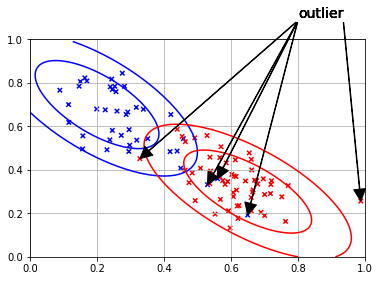

In [25]:
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.scatter(points[:,0],points[:,1],c = lab_co, s = 20, 
                     marker = "x",linewidths=3)
plt.contour(x, y, mvn1.pdf(pos),levels = [level_95_1,
                                                    level_68_1],colors = "blue")
plt.contour(x, y, mvn2.pdf(pos),levels = [level_95_2,
                                                    level_68_2],colors = "red")
####anotate 5 outliers
outlier = points[np.logical_or(np.logical_and(mvn1.pdf(points)<level_95_1, labels==0),
                              np.logical_and(mvn2.pdf(points)<level_95_2, labels==1))]

for i in range(len(outlier)):
    plt.annotate('outlier', xy = outlier[i], xytext = (0.8, 1.1),
                 fontsize = 14,
                 arrowprops = dict(facecolor = "black", shrink = 2, width = 0.5))
_ = plt.show()

### Problem 3: Conway’s Game of Life (4 points)
Conway’s Game of Life (https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)
is a classic example of a cellular automaton devised by mathematician John Conway. The
game is a classic example of how simple rules can give rise to complex behavior. The game
is played on an m-by-n board, which we will represent as an **m-by-n** matrix. The game
proceeds in steps. At any given time, each cell of the board (i.e., entry of our matrix), is
either alive (which we will represent as a 1) or dead (which we will represent as a 0). At
each step, the board evolves according to a few simple rules:

* A live cell with fewer than two live neighbors becomes a dead cell.
* A live cell with more than three live neighbors becomes a dead cell.
* A live cell with two or three live neighbors remains alive.
* A dead cell with exactly three live neighbors becomes alive.
* All other dead cells remain dead.

The neighbors of a cell are the 8 cells adjacent to it, i.e., left, right, above, below, upperleft, lower-left, upper-right and lower-right. We will follow the convention that the board
is toroidal, so that using matrix-like notation (i.e., the cell (0, 0) is in the upper-left of
the board and the first coordinate specifies a row), the upper neighbor of the cell (0, 0)
is (m − 1, 0), the right neighbor of the cell (m − 1, n − 1) is (m − 1, 0), etc. That is, the
board “wraps around”. **Note:** you are not required to use this matrix-like indexing. It’s
just what I chose to use to explain the toroidal property.

#### 3.1:

Write a function **is_valid_board** that takes an m-by-n numpy array (i.e., an ndarray)
as its only argument and returns a Python Boolean that is True if and only if the
argument is a valid representation of a Game of Life board. A valid board is any
two-dimensional numpy ndarray with all entries either 0.0 and 1.0.

In [48]:
def is_valid_board(board):
    if not isinstance(board, np.ndarray):
        raise TypeError("input numpy array only")
    #or set([j for i in arr for j in i]) == {0,1}
    if np.logical_or(board==1,board==0).all() and board.ndim == 2:
        return True
    else: 
        return False

#### 3.2:
Write a function called **gol_step** that takes an m-by-n numpy array as its argument
and returns another numpy array of the same size (i.e., also m-by-n), corresponding
to the board at the next step of the game. Your function should perform error
checking to ensure that the provided argument is a valid Game of Life board.

In [49]:
def live_neighbors_count(board):
    """
        returns the mapping of alive neighbors
        arr: a numpy matrix of M*N dimension
    """
    if not is_valid_board(board):
        raise ValueError("please input valid board")
    M,N = board.shape[0], board.shape[1]
    neighors_num = np.zeros(board.shape)
    for r in range(M):
        for c in range(N):
            neighors_num[r,c] = [board[r,(c+1)%N],
                board[r,(c-1)%N],
                board[(r+1)%M,c],
                board[(r-1)%M,c],
                board[(r+1)%M,(c+1)%N],
                board[(r+1)%M,(c-1)%N],
                board[(r-1)%M,(c+1)%N],
                board[(r-1)%M,(c-1)%N]].count(1)
    return neighors_num
def gol_step(board):
    ref = live_neighbors_count(board)
    for r in range(board.shape[0]):
        for c in range(board.shape[1]):
            #live
            if board[r,c] == 1:
                if  ref[r,c] < 2 or ref[r,c] > 3:
                    ref[r,c] = 0
                elif ref[r,c] in (2,3):
                    ref[r,c] = 1
                else: ref[r,c] = 0
            #dead
            else:
                if ref[r,c] == 3:
                    ref[r,c] = 1
                else:
                    ref[r,c] = 0
    return ref

In [50]:
top_5 = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,1,1,1,0],[0,0,0,0,0]])
top_5

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [51]:
gol_step(top_5)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0.]])

#### 3.3: 
Write a function called **draw_gol_board** that takes an m-by-n numpy array (i.e.,
an ndarray) as its only argument and draws the board as an m-by-n set of tiles,
colored black or white correspond to whether the corresponding cell is alive or dead,
respectively. Your plot should not have any grid lines, nor should it have any axis
labels or axis ticks. Hint: see the functions plt.xticks() and plt.yticks() for
changing axis ticks. Hint: you may find the function plt.get_cmap to be useful
for working with the matplotlib Colormap objects.

In [31]:
def draw_gol_board(board):
    if not is_valid_board(board):
        raise ValueError("please input valid board")
    plt.imshow(board, cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.show()

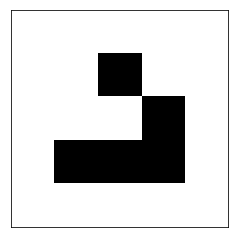

In [32]:
draw_gol_board(top_5)

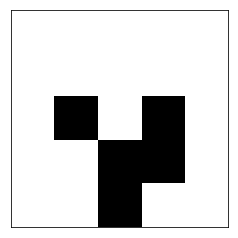

In [33]:
draw_gol_board(gol_step(top_5))

#### 3.4:
Create a 20-by-20 numpy array corresponding to a Game of Life board in which all
cells are dead, with the exception that the top-left 5-by-5 section of the board looks
like this:

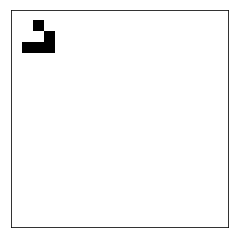

In [34]:
top_5 = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,1,1,1,0],[0,0,0,0,0]])
life_board = np.zeros([20,20])
life_board[0:5,0:5] = top_5
draw_gol_board(life_board)

#### 3.5:
Generate a plot with 5 subplots, arranged in a 5-by-1 grid, showing the first five
steps of the Game of Life when started with the board you just created, with the
steps ordered from top to bottom, The figure in the 5-by-5 sub-board above is called
a *glider*, and it is interesting in that, as you can see from your plot, it seems to move
along the board as you run the game.

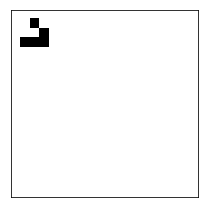

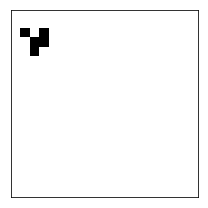

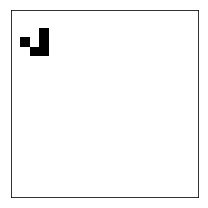

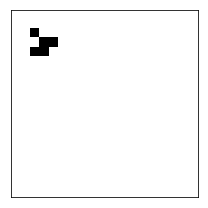

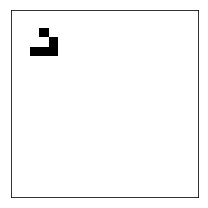

In [35]:
top_5 = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,1,1,1,0],[0,0,0,0,0]])
life_board = np.zeros([20,20])
life_board[0:5,0:5] = top_5
plt.figure(figsize=(20, 20))
plt.subplot(5, 1, 1)
plt1 = draw_gol_board(life_board)
#########step1##############
plt.figure(figsize=(20, 20))
plt.subplot(5, 1, 2)
step2 = gol_step(life_board)
draw_gol_board(step2)
#########step2##############
plt.figure(figsize=(20, 20))
plt.subplot(5, 1, 3)
step3 = gol_step(step2)
draw_gol_board(step3)
##########step3#############
plt.figure(figsize=(20, 20))
plt.subplot(5, 1, 4)
step4 = gol_step(step3)
draw_gol_board(step4)
##########step4#############
plt.figure(figsize=(20, 20))
plt.subplot(5, 1, 5)
step5 = gol_step(step4)
draw_gol_board(step5)

#### Optional additional exercise: 
create a function that takes two arguments, a Game
of Life board and a number of steps, and generates an animation of the game as it runs
for the given number of steps.

In [36]:
top_5 = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,1,1,1,0],[0,0,0,0,0]])
life_board = np.zeros([20,20])
life_board[0:5,0:5] = top_5
#enable animation
%matplotlib inline
from IPython.display import display, clear_output
import time
import pylab as pl
def animate(board, steps):
    assert is_valid_board(board) and isinstance(steps, int) \
        and(steps >= 0),"check valid input/ board and valid steps as int"
    temp = np.copy(board)
    if steps == 0: draw_gol_board(temp)
    for i in range(steps):
        temp = gol_step(temp)
        plot_i = draw_gol_board(temp)
        clear_output(wait=True)
        time.sleep(0.3)

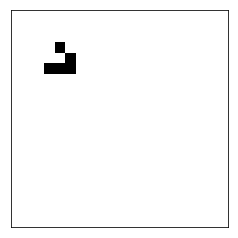

In [220]:
animate(life_board,8)